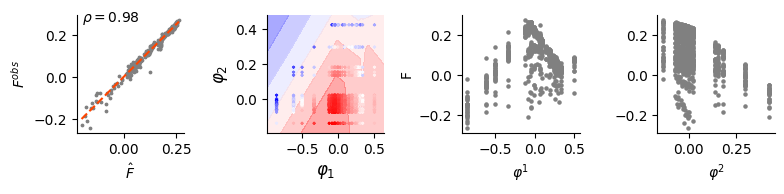

In [36]:
from dlim import DLIM
from dlim.utils import Data_model, train, spectral_init, compute_cor_scores
from dlim.sim_data import Simulated
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import numpy as np
from numpy import mean, exp, log, linspace
from numpy.random import choice, seed
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
import pandas as pd

data = Data_model("./data/data_env_1.csv", 2)
seed(42)
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)

train_data = data[train_id, :]
val_data = data[[i for i in range(data.data.shape[0]) if i not in train_id], :]

tmp = []
model = DLIM(2, nb_state=37, hid=32, nb_layer=0)
model.spec_init_emb(train_data, data.mut_to_index, sim="pearson")
losses = train(model, train_data, nb_epoch=300, lr=1e-3, wei_dec=1e-4, bsize=16, pen_emb=1e-1)
fit, var, _ = model(val_data[:, :-1].long(), detach=True)
cor = pearsonr(fit.flatten(), val_data[:, -1].flatten())[0]

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
ax.scatter(fit, val_data[:, [-1]].detach(), s=3, c="grey")
x = linspace(min(fit), max(fit), num=100)
y = linspace(min(fit), max(fit), num=100)
ax.plot(x, y, lw=1.5, linestyle="--", c="orangered")
ax.set_xlabel("$\\hat{F}$")
ax.set_ylabel("$F^{obs}$")
score = r2_score(fit.flatten(), val_data[:, [-1]].flatten())
# score = pearsonr(fit.flatten(), val_data[:, [-1]].flatten())[0]
ax.text(fit.min(), fit.max(), f"$\\rho={score:.2f}$")

model.plot(bx, data)

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
    bx.spines[el].set_visible(False)
    cx.spines[el].set_visible(False)
    dx.spines[el].set_visible(False)
ax.set_aspect(1)
# bx.set_aspect(1)

# Plot the a00verage curve
fit_a, var_a, lat_a = model(data[:, :-1].long(), detach=True)
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^1$")
dx.set_xlabel("$\\varphi^2$")
plt.tight_layout()
plt.savefig("./img/spec_harry_env1.png", dpi=300, transparent=True)
plt.show()

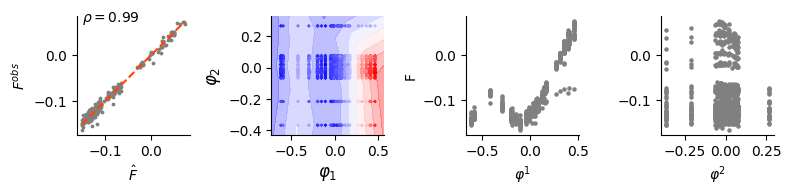

In [37]:
from dlim import DLIM
from dlim.utils import Data_model, train, spectral_init, compute_cor_scores
from dlim.sim_data import Simulated
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import numpy as np
from numpy import mean, exp, log, linspace
from numpy.random import choice, seed
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
import pandas as pd

data = Data_model("./data/data_env_2.csv", 2)
seed(42)
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)

train_data = data[train_id, :]
val_data = data[[i for i in range(data.data.shape[0]) if i not in train_id], :]

tmp = []
model = DLIM(2, nb_state=37, hid=32, nb_layer=0)
model.spec_init_emb(train_data, data.mut_to_index, sim="pearson")
losses = train(model, train_data, nb_epoch=300, lr=1e-3, wei_dec=1e-4, bsize=16, pen_emb=1e-1)
fit, var, _ = model(val_data[:, :-1].long(), detach=True)
cor = pearsonr(fit.flatten(), val_data[:, -1].flatten())[0]

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
ax.scatter(fit, val_data[:, [-1]].detach(), s=3, c="grey")
x = linspace(min(fit), max(fit), num=100)
y = linspace(min(fit), max(fit), num=100)
ax.plot(x, y, lw=1.5, linestyle="--", c="orangered")
ax.set_xlabel("$\\hat{F}$")
ax.set_ylabel("$F^{obs}$")
score = r2_score(fit.flatten(), val_data[:, [-1]].flatten())
# score = pearsonr(fit.flatten(), val_data[:, [-1]].flatten())[0]
ax.text(fit.min(), fit.max(), f"$\\rho={score:.2f}$")

model.plot(bx, data)

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
    bx.spines[el].set_visible(False)
    cx.spines[el].set_visible(False)
    dx.spines[el].set_visible(False)
ax.set_aspect(1)
# bx.set_aspect(1)

# Plot the a00verage curve
fit_a, var_a, lat_a = model(data[:, :-1].long(), detach=True)
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^1$")
dx.set_xlabel("$\\varphi^2$")
plt.tight_layout()
plt.savefig("./img/spec_harry_env2.png", dpi=300, transparent=True)
plt.show()

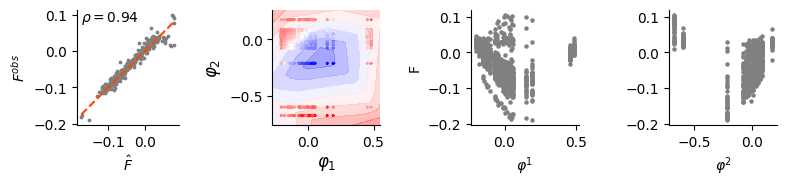

In [55]:
from dlim import DLIM
from dlim.utils import Data_model, train, spectral_init, compute_cor_scores
from dlim.sim_data import Simulated
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import numpy as np
from numpy import mean, exp, log, linspace
from numpy.random import choice, seed
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
import pandas as pd

data = Data_model("./data/data_epis_1.csv", 2)
seed(42)
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)

train_data = data[train_id, :]
val_data = data[[i for i in range(data.data.shape[0]) if i not in train_id], :]

tmp = []
model = DLIM(2, nb_state=37, hid=16, nb_layer=1)
model.spec_init_emb(train_data, data.mut_to_index, sim="pearson")
losses = train(model, train_data, nb_epoch=300, lr=1e-3, wei_dec=1e-4, bsize=16, pen_emb=1e-1)
fit, var, _ = model(val_data[:, :-1].long(), detach=True)
cor = pearsonr(fit.flatten(), val_data[:, -1].flatten())[0]

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
ax.scatter(fit, val_data[:, [-1]].detach(), s=3, c="grey")
x = linspace(min(fit), max(fit), num=100)
y = linspace(min(fit), max(fit), num=100)
ax.plot(x, y, lw=1.5, linestyle="--", c="orangered")
ax.set_xlabel("$\\hat{F}$")
ax.set_ylabel("$F^{obs}$")
score = r2_score(fit.flatten(), val_data[:, [-1]].flatten())
# score = pearsonr(fit.flatten(), val_data[:, [-1]].flatten())[0]
ax.text(fit.min(), fit.max(), f"$\\rho={score:.2f}$")

model.plot(bx, data)

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
    bx.spines[el].set_visible(False)
    cx.spines[el].set_visible(False)
    dx.spines[el].set_visible(False)
ax.set_aspect(1)
# bx.set_aspect(1)

# Plot the a00verage curve
fit_a, var_a, lat_a = model(data[:, :-1].long(), detach=True)
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^1$")
dx.set_xlabel("$\\varphi^2$")
plt.tight_layout()
plt.savefig("./img/spec_harry_epis.png", dpi=300, transparent=True)
plt.show()